In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats
data=pd.read_csv("https://gist.githubusercontent.com/EconometricsBySimulation/5735039/raw/c77c7e9ca27f45ca989200f696f0ccc5aec4132a/heightweight.csv",usecols=("heightIn","weightLb"))
data.head()

,heightIn,weightLb
0,56.3,85.0
1,62.3,105.0
2,63.3,108.0
3,59.0,92.0
4,62.5,112.5


In [2]:
data.isnull().sum()

heightIn    0
weightLb    0
dtype: int64

In [3]:
stats.shapiro(data['heightIn'])

ShapiroResult(statistic=0.9962847828865051, pvalue=0.8473318219184875)

In [4]:
stats.shapiro(data['weightLb'])

ShapiroResult(statistic=0.9699857234954834, pvalue=6.59234938211739e-05)

{'whiskers': [<matplotlib.lines.Line2D at 0x146651c2e50>,
 'caps': [<matplotlib.lines.Line2D at 0x146651d25b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x146651c2ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x146651d2cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x146651de0a0>],
 'means': []}

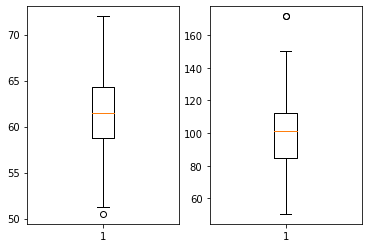

In [5]:
plt.subplot(1,2,1)
plt.boxplot(data['heightIn'])
plt.subplot(1,2,2)
plt.boxplot(data['weightLb'])

In [6]:
data.shape

(237, 2)

In [7]:
train=data.iloc[0:189]
train.shape

(189, 2)

In [8]:
test=data.iloc[189:237]
test.shape

(48, 2)

C:\Users\kirut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

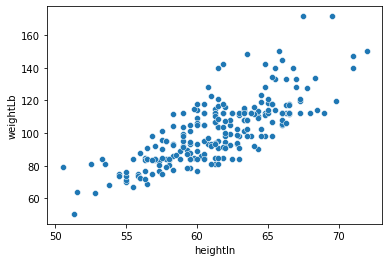

In [9]:
sns.scatterplot('heightIn','weightLb',data=data)

In [10]:
stats.pearsonr(data.heightIn,data.weightLb)

(0.7748761066276016, 1.0286858314032039e-48)

In [11]:
train_x=train.heightIn
train_y=train.weightLb
train_x=sm.add_constant(train_x)
model=sm.OLS(train_y,train_x).fit()
model.summary()

C:\Users\kirut\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               weightLb   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.61e-36
Time:                        15:34:41   Log-Likelihood:                -743.32
No. Observations:                 189   AIC:                             1491.
Df Residuals:                     187   BIC:                             1497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -123.6766     14.137     -8.748      0.000    -151.565     -95.788
heightIn       3.6595      0.230     15.882      0.000       3.205       4.114
==============================================================================
Omnibus:                       28.024   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.777
Skew:                           0.900   Prob(JB):                     6.26e-09
Kurtosis:                       4.247   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
test_x=test.heightIn
test_y=test.weightLb
test_x=sm.add_constant(test_x)
model=sm.OLS(test_y,test_x).fit()
model.summary()

C:\Users\kirut\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               weightLb   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.26e-13
Time:                        15:34:41   Log-Likelihood:                -185.34
No. Observations:                  48   AIC:                             374.7
Df Residuals:                      46   BIC:                             378.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -165.2496     26.577     -6.218      0.000    -218.747    -111.752
heightIn       4.3648      0.429     10.186      0.000       3.502       5.227
==============================================================================
Omnibus:                       13.260   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.347
Skew:                           1.083   Prob(JB):                     0.000766
Kurtosis:                       4.575   Cond. No.                         972.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

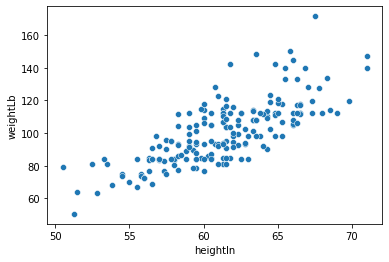

In [13]:
sns.scatterplot(x=train.heightIn,y=train.weightLb)

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

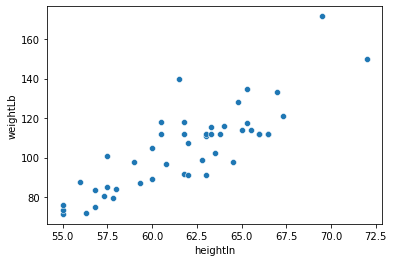

In [14]:
sns.scatterplot(x=test.heightIn,y=test.weightLb)

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

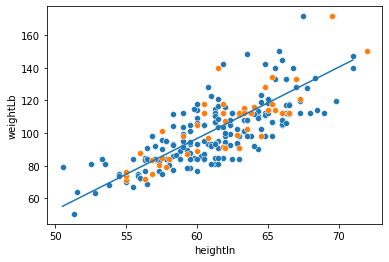

In [15]:
sns.scatterplot(x=train.heightIn,y=train.weightLb)
sns.scatterplot(x=test.heightIn,y=test.weightLb)
predicted_y=model.predict(train_x)
sns.lineplot(x=train.heightIn,y=predicted_y)